In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math as m

In [42]:
Utrecht = pd.read_csv('Utrecht.csv', encoding='utf-8')
#shufflar vår data så att vi inte får en bias när vi tränar & testar (Ex det är möjligt att stora boytor är längst ner i vår lista)
Utrecht = Utrecht.sample(frac=1,random_state=20241125)
print( max(Utrecht['ar']) )

2017


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pris   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     561.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           4.76e-54
Time:                        11:26:26   Log-Likelihood:                -538.16
No. Observations:                 100   AIC:                             1082.
Df Residuals:                      97   BIC:                             1090.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.3719     22.870      4.214      0.000      50.981     141.762
bo_yta         4.5963      0.169     27.200      0.000       4.261       4.932
tomt           0.4482      0.198      2.260      0.026       0.055       0.842
==============================================================================
Omnibus:                        2.195   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                2.138
Skew:                          -0.289   Prob(JB):                        0.343
Kurtosis:                       2.577   Cond. No.                         786.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

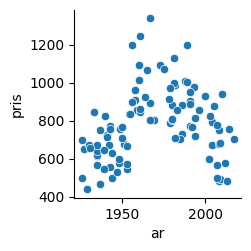

In [78]:
tester = smf.ols(formula='pris~bo_yta+tomt',data=Utrecht)
Utrecht['res'] = tester.fit().resid
sns.pairplot(Utrecht,x_vars={'ar'},y_vars='pris')
tester.fit().summary()

Adj. R-squared blir sämre om vi tränar med 90 datapunkter jämfört med 80
Vidare förbättrar inte balkong prediktionen, dessutom är 0 inom balkongkoefficientens konfidensintervall

In [75]:
nbr_train_data = 80
#Enkel regression av pris
res = smf.ols(formula='pris~bo_yta+ar+I(ar**2)+tomt',data=Utrecht[:nbr_train_data])
Utrecht['res'] = res.fit().resid
model =res.fit()
Utrecht['res'] = Utrecht['pris'] - model.predict(Utrecht)
fit=res.fit()
fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pris   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     734.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           2.69e-59
Time:                        11:22:10   Log-Likelihood:                -384.21
No. Observations:                  80   AIC:                             778.4
Df Residuals:                      75   BIC:                             790.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.194e+05   2.76e+04     -4.331      0.000   -1.74e+05   -6.45e+04
bo_yta         4.7804      0.121     39.485      0.000       4.539       5.022
ar           122.7772     27.956      4.392      0.000      67.085     178.469
I(ar ** 2)    -0.0315      0.007     -4.452      0.000      -0.046      -0.017
tomt           0.4928      0.128      3.859      0.000       0.238       0.747
==============================================================================
Omnibus:                        0.942   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.411
Skew:                          -0.006   Prob(JB):                        0.814
Kurtosis:                       3.351   Cond. No.                     3.14e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

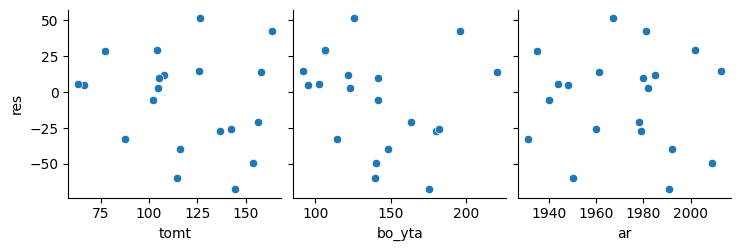

In [74]:
#Visar residualer för vår modell med testdata
sns.pairplot(Utrecht[nbr_train_data:],x_vars={'bo_yta','tomt','ar'},y_vars='res')

((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([ 486.56322306,  564.54278408,  572.8783184 ,  613.51714995,
          656.1395112 ,  669.76685981,  679.28924773,  712.66638881,
          732.78829032,  755.18378963,  777.30049435,  798.5679156 ,
          822.94067738,  842.34578837,  925.98199801,  954.34910559,
          991.82921463, 1038.86677821, 1087.65405845, 1238.72010597])),
 (201.84119915842982, 796.094584977092, 0.9857522349401104))

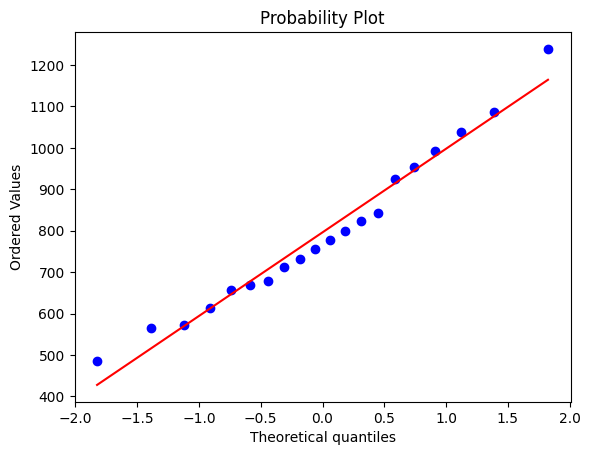

In [60]:
#residualerna verkar väldigt normalfördelade
pred_res = fit.predict(Utrecht[nbr_train_data:])
stats.probplot(x=pred_res,fit = True,plot=plt)

In [ ]:
target = pd.DataFrame({"bo_yta": [175], "ar": [2022], "tomt": [150]})
fit.get_prediction(target).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,839.394908,16.489914,806.545315,872.244501,770.416433,908.373383


: 

Löser 3.3 uppgift 2 genom att ge oss värdet av vår t-funktion (ta) som vårt nedåtbegränsade konfidensintervall har.

In [ ]:

X_inv = np.array(fit.cov_params())
print(fit.cov_params())
x0 = np.array([1,175,2022,2022**2,150])
print(fit.mse_resid)
sigma = m.sqrt(fit.mse_resid+np.matmul(np.matmul(x0.T,fit.cov_params()),x0))


print(fit.predict(target))
ta = (875-fit.predict(target))/sigma
print(ta)
#alpha = 0.1536 get oss rätt t-funktion

               Intercept       bo_yta             ar  I(ar ** 2)         tomt
Intercept   7.604716e+08  1356.348554 -770934.953014  195.266200  1174.275499
bo_yta      1.356349e+03     0.014658      -1.370170    0.000346    -0.003418
ar         -7.709350e+05    -1.370170     781.560495   -0.197962    -1.190362
I(ar ** 2)  1.952662e+02     0.000346      -0.197962    0.000050     0.000301
tomt        1.174275e+03    -0.003418      -1.190362    0.000301     0.016307
927.0407510779373
0    839.394908
dtype: float64
0    1.028277
dtype: float64
